# Generate gamma

In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wavfile
import sys
sns.set()
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (10, 3)

### Twelve-tone equal temperament

f(i) = f_0 * 2^(i/12)<br/>
f(i) - the pitch, or frequency (usually in hertz), we need to find;<br/>
f_0 - the frequency of the reference pitch.

The reference pitch also known as Stuttgart pitch is A4, the 49th key from the left end of a piano, tuned to 440 Hz.<br/>

For the First octave we have the following notation of notes:<br/>
C4 -- 40th key <br/>
D4 -- 42th key <br/>
E4 -- 44th key <br/>
F4 -- 45th key <br/>
G4 -- 47th key <br/>
A4 -- 49th key <br/>
B4 -- 51th key .

In [2]:
A4 = 440

In [3]:
gamma_C_major = {'C4' : 40,
                'D4': 42,
                'E4' : 44,
                'F4' : 45,
                'G4' : 47,
                'A4': 49,
                'B4' : 51}

In [4]:
freq_1octave = dict()
for k, v in gamma_C_major.items():
    freq_1octave[k] = A4 * (2 ** ((v - gamma_C_major['A4']) / 12))
freq_1octave

{'A4': 440.0,
 'B4': 493.8833012561241,
 'C4': 261.6255653005986,
 'D4': 293.6647679174076,
 'E4': 329.6275569128699,
 'F4': 349.2282314330039,
 'G4': 391.99543598174927}

In [5]:
sample_rate = 44100 # sample rate
sample_period = 1 / sample_rate # sample period
t = 1 # seconds of sampling
N = sample_rate * t # total points in signal
t_vec = np.arange(N) * sample_period

## Sine Wave Sampling

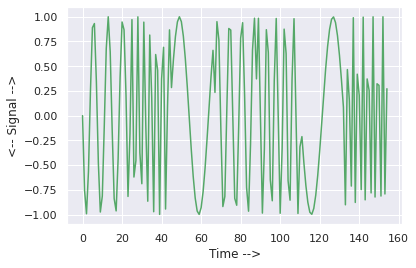

In [6]:
notes = [np.sin( 2 * np.pi * v * t_vec) for v in freq_1octave.values()]
gamma = np.concatenate(notes)

plt.plot(gamma[::2000], 'g')
plt.xlabel("Time -->")
plt.ylabel("<-- Signal -->")
plt.show()


In [20]:
normalized_gamma = np.int16((gamma / gamma.max()) * 32767)
wavfile.write('sine_waves_c_major.wav', sample_rate, normalized_gamma)
print("Generated notes were saved to file: sine_waves_c_major.wav")


Generated notes were saved to file: sine_waves_c_major.wav


## Inverse Fourier Transformation

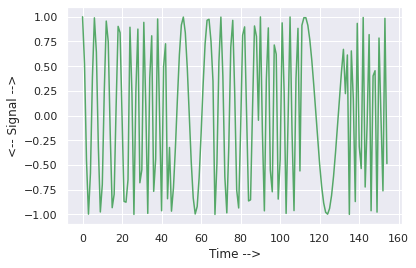

Generated notes were saved to file: fourier_trans.wav


In [36]:
notes = []
for v in freq_1octave.values():
    A = np.zeros(int(sample_rate / 2))
    A[int(v)] = sample_rate / 2
    note = np.fft.irfft(A)
    notes.append(np.tile(note, t))

gamma = np.concatenate(notes)

plt.plot(gamma[::2000], 'g')
plt.xlabel("Time -->")
plt.ylabel("<-- Signal -->")
plt.show()


wavfile.write('fourier_trans.wav', sample_rate, gamma)
print("Generated notes were saved to file: fourier_trans.wav")


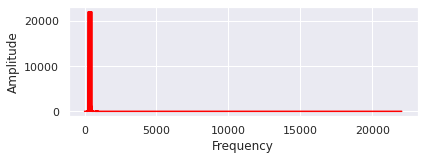

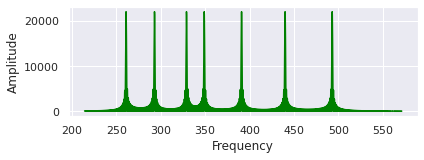

In [37]:
fft_spectrum = np.fft.rfft(gamma)
frequencies = np.fft.rfftfreq(gamma.size, d=1./sampFreq)
fft_spectrum_abs = np.abs(fft_spectrum)
plt.subplot(2,1,1)
plt.plot(frequencies, fft_spectrum_abs, 'red')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
plt.subplot(2,1,2)
plt.plot(frequencies[1500:4000], fft_spectrum_abs[1500:4000], 'green')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


### Delete noises

In [38]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 200: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(frequencies[i],1),  np.round(f)))

frequency = 237.6 Hz with amplitude 200.0 
frequency = 238.4 Hz with amplitude 210.0 
frequency = 238.6 Hz with amplitude 211.0 
frequency = 239.3 Hz with amplitude 203.0 
frequency = 239.4 Hz with amplitude 222.0 
frequency = 239.6 Hz with amplitude 224.0 
frequency = 239.7 Hz with amplitude 208.0 
frequency = 240.3 Hz with amplitude 215.0 
frequency = 240.4 Hz with amplitude 236.0 
frequency = 240.6 Hz with amplitude 238.0 
frequency = 240.7 Hz with amplitude 220.0 
frequency = 241.3 Hz with amplitude 228.0 
frequency = 241.4 Hz with amplitude 251.0 
frequency = 241.6 Hz with amplitude 253.0 
frequency = 241.7 Hz with amplitude 233.0 
frequency = 242.3 Hz with amplitude 242.0 
frequency = 242.4 Hz with amplitude 267.0 
frequency = 242.6 Hz with amplitude 270.0 
frequency = 242.7 Hz with amplitude 248.0 
frequency = 243.3 Hz with amplitude 257.0 
frequency = 243.4 Hz with amplitude 286.0 
frequency = 243.6 Hz with amplitude 289.0 
frequency = 243.7 Hz with amplitude 265.0 
frequency =

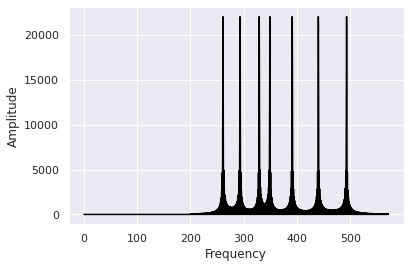

In [41]:
for i,f in enumerate(frequencies):
    if f < 200 or f > 20000:
        fft_spectrum[i] = 0.0
        
plt.plot(frequencies[:4000], np.abs(fft_spectrum[:4000]),'black')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


In [42]:
noiseless_signal = np.fft.irfft(fft_spectrum)
wavfile.write('c_major_noiseless.wav', sampFreq, noiseless_signal)
print("Generated notes were saved to file: c_major_noiseless.wav")


Generated notes were saved to file: c_major_noiseless.wav
